In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


(444, 508)

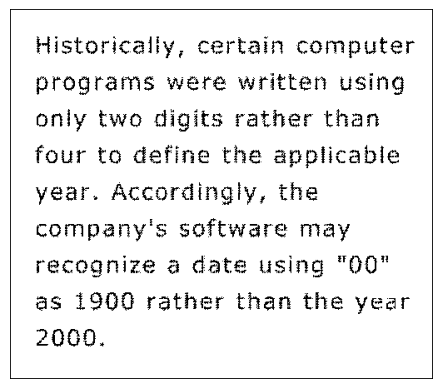

In [2]:
img7 = plt.imread("/content/Fig4.19(a).jpg")
plt.imshow(img7,cmap='gray')
plt.axis("off")
img7.shape

<Figure size 640x480 with 0 Axes>

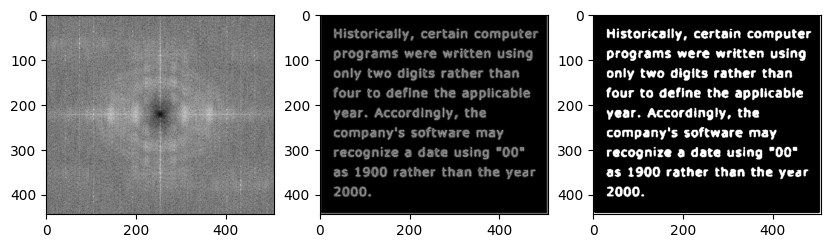

In [3]:
plt.gray()

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def gaussian(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = np.exp(((-distance((y, x), center) ** 2) / (2 * (D0 ** 2))))
    return base



s1 = 444
s2 = 508
v = 50
H = 1 - gaussian(v, (s1, s2))
# Read image from file
img = cv2.normalize(cv2.imread("/content/Fig4.19(a).jpg", cv2.IMREAD_GRAYSCALE).astype("float"), None, 0.0, 1.0, cv2.NORM_MINMAX)
# Take Fourier transform
af = np.fft.fftshift(np.fft.fft2(img))
# Conv filter and mask in frequency mode
t = af * H
# Take real part of complex number
M_Id = np.abs(t)
# Take log from image
M_IdLog = np.log(1 + M_Id)
# Calc max of 2D image
Max = np.max(np.max(M_IdLog))
# Plot image
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(M_IdLog / Max)
# Return from frequency to place
cfli1 = np.fft.ifft2(np.fft.ifftshift(t))
# Take real part of complex number
IFFTt = np.abs(cfli1)
# Calc max of 2D image
Max2 = np.max(np.max(IFFTt))
# Plot image
plt.subplot(132)
plt.imshow(IFFTt / Max2)
# Plot binary image
plt.subplot(133)
ret,bw = cv2.threshold(IFFTt / Max2, .2, 1, cv2.THRESH_BINARY)
plt.imshow(bw)
plt.show()